In [1]:
from citylearn import  CityLearn
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
np.random.seed(3)

In [2]:
# Load environment
data_folder = Path("data/")
building_attributes = data_folder / 'building_attributes.json'
solar_profile = data_folder / 'solar_generation_1kW.csv'
building_state_actions = 'buildings_state_action_space.json'
#building_ids = ["Building_1","Building_2","Building_3","Building_4","Building_5","Building_6","Building_7","Building_8","Building_9"]
building_ids = ["Building_1"]
env = CityLearn(building_attributes, solar_profile, building_ids, buildings_states_actions = building_state_actions, cost_function = ['ramping','1-load_factor','peak_to_valley_ratio','peak_demand','net_electricity_consumption'])
observations_spaces,actions_spaces = env.get_state_action_spaces()

In [3]:
actions_space=np.arange(-0.2,0.21,0.2)
actions_space

array([-0.2,  0. ,  0.2])

In [12]:
actions_space=np.arange(-0.2,0.21,0.2)
num_actions=actions_space.shape[0]
def generate_state(state):
    l=np.zeros(24)
    l[int(state)-1]=1
    return(l)
#reward fucntion 1
def reward_fun1(hr,action):
    if hr in np.arange(2,10):
        if action>0:
            reward=10
        else:
            reward=-10
    elif hr in np.arange(10,12):
        if action==0:
            reward=10
        else:
            reward=-10
    elif hr in np.arange(12,20):
        if action<0:
            reward=10
        else:
            reward=-10
    else:
        if action==0:
            reward=10
        else:
            reward=-10
    return(reward)
#reward fucntion 2
def reward_comparitive2(lister):
    if lister[0]<lister[1]:
        return(-10)
    else:
        return(10)

#reward_function 3
def reward_fun4(mu,temp_diff,action,soc,epsilon=0.01):
    p=np.sign(mu-temp_diff)
    a=(p+1)*action
    b=p*(np.sign(soc+p*action-epsilon-1)+1)
    if action<0:
        c=epsilon*action*p*np.sign(soc+action)
    else:
        c=epsilon*action*p
    return(a-b+c)
    


Text(0.5, 1.0, 'RBC')

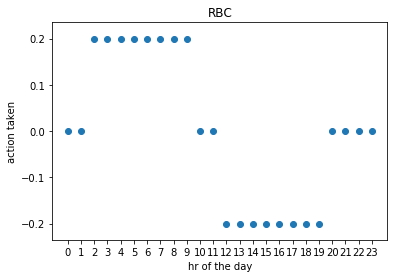

In [13]:
actions_desired=[0]*2+[0.2]*8+[0]*2+[-0.2]*8+[0]*4
plt.scatter(range(24),actions_desired)
plt.xticks(np.arange(24))
plt.xlabel('hr of the day')
plt.ylabel('action taken')
plt.title('RBC')

In [11]:
#basic on policy sarsa-working
#using reward fucntion 1
cost, cum_reward = {}, {}
gamma=0.99
alpha=0.1
na=num_actions
from collections import defaultdict
state_action=defaultdict()
w=np.ones((3,24))
for ep in range(1):
    print(ep)
    cum_reward[ep]=[]
    s = env.reset()[0][1]
    state=generate_state(s)
    done = False
    i=0
    while not done:
        q_s_a_s=np.matmul(w,state.T)
        action_ind=np.argmax(q_s_a_s)
        
        q_s=q_s_a_s[action_ind]
        action=actions_space[action_ind]
        state_action[s]=action
        ns, reward, done, _ = env.step([[action]])
        ns_=ns[0][1]
        
        next_state=generate_state(ns_)
        #print(s)
        reward=reward_fun(int(s)-1,action)
        cum_reward[ep].append(reward)
        q_s_dash_a_s=np.matmul(w,next_state)
        epsilon=np.random.rand(1)
        if epsilon<0.9:
            action_index=np.argmax(q_s_dash_a_s)
            action_dash=actions_space[action_index]
            q_s_dash=np.max(q_s_dash_a_s)
        else:
            action_index=np.random.choice(na)
            action_dash=actions_space[action_index]
            q_s_dash=q_s_dash_a_s[action_index]
        
        temp=np.zeros((num_actions,24))
        temp[action_ind,:]=state
        w=w+alpha*(reward+gamma*q_s_dash-q_s)*(temp)
        action=action_dash
        state=next_state
        s=ns_
    delta=sum([abs(i-j) for i,j  in zip(list(state_action.values()),actions_desired)])
    if delta==0:
        break
        
    cost[ep] = env.cost()
    print(cost[ep])    
        

0


TypeError: reward_fun() missing 2 required positional arguments: 'action' and 'soc'

In [7]:
#on policy sarsa
from reward_function import reward_function

actions_space=np.arange(-0.2,0.21,0.2)
num_actions=actions_space.shape[0]

actions_desired=[0]*2+[0.2]*8+[0]*2+[-0.2]*8+[0]*4

cost, cum_reward = {}, {}
gamma=0.99
alpha=0.001
na=num_actions
from collections import defaultdict
state_action=defaultdict()
state_reward_t={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
state_reward_t_1={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}

for ep in range(2):
    print(ep)
    
    cum_reward[ep]=[]
    sq = env.reset()
    t_out=[sq[0][3]]
    t_in=[sq[0][8]]
    s=sq[0][1]
    
    state=generate_state(s)
    done = False
    i=0
    
    q_s_a_s=np.matmul(w,state.T)
    epsilon=np.random.rand(1)

    if epsilon<0.9:
        action_index=np.argmax(q_s_a_s)
        action=actions_space[action_index]
        q_s=np.max(q_s_a_s)
    else:
        action_index=np.random.choice(na)
        action=actions_space[action_index]
        q_s=q_s_a_s[action_index]

    i=0
    while not done:
        action_ind=action_index
        state_action[s]=action
        ns, reward, done, _ = env.step([[action]])
        p=t_out[-1]-t_in[-1]
        reward=reward[0]*p*10
        state_reward_t[s]=reward
        
        cum_reward[ep].append(reward)
        
        t_out.append(ns[0][3])
        t_in.append(ns[0][8])
        ns_=ns[0][1]
        
        next_state=generate_state(ns_)
        
        q_s_dash_a_s=np.matmul(w,next_state)
        epsilon=np.random.rand(1)
        if epsilon<0.9:
            action_index=np.argmax(q_s_dash_a_s)
            action_dash=actions_space[action_index]
            q_s_dash=np.max(q_s_dash_a_s)
        else:
            action_index=np.random.choice(na)
            action_dash=actions_space[action_index]
            q_s_dash=q_s_dash_a_s[action_index]
        
        temp=np.zeros((num_actions,24))
        temp[action_ind,:]=state
        
        w=w+alpha*(reward+gamma*q_s_dash-q_s)*(temp)
        action=action_dash
        state=next_state
        s=ns_
        q_s=q_s_dash
        
    delta=sum([abs(i-j) for i,j  in zip(list(state_action.values()),actions_desired)])
 
    cost[ep] = env.cost()
        

0


NameError: name 'w' is not defined

In [8]:
from reward_function import reward_function
#reward function 3
actions_space=np.arange(-0.2,0.21,0.2)
num_actions=actions_space.shape[0]

actions_desired=[0]*2+[0.2]*8+[0]*2+[-0.2]*8+[0]*4

cost, cum_reward = {}, {}
gamma=0.99
alpha=0.1
na=num_actions
from collections import defaultdict
state_action=defaultdict()

mu=12.5
i=0
w=np.zeros((num_actions,24))
for ep in range(1):
    
    diff=[]
    cum_reward[ep]=[]
    
    sq = env.reset()
    t_out=[sq[0][3]]
    t_in=[sq[0][8]]
    soc=sq[0][-2]
    s=sq[0][1]
    
    state=generate_state(s)
    done = False

    state=generate_state(s)
    q_s_a_s=np.matmul(w,state.T)
    action=actions_space[np.argmax(q_s_a_s)]
    action_index=np.argmax(q_s_a_s)
    
    while not done:
        
        temp=np.zeros((num_actions,24))
        temp[action_index,:]=state
        
        state_action[s]=action
        ns, reward, done, _ = env.step([[action]])
        
        reward=reward_fun(mu,t_out[-1],action,soc)
        state_reward_t[s]=reward
        temp_diff=t_out[-1]-t_in[-1]
        diff.append(temp_diff)
        
        cum_reward[ep].append(reward)
        
        t_out.append(ns[0][3])
        t_in.append(ns[0][8])
        soc=ns[0][-2]
        ns_=ns[0][1]
        
        next_state=generate_state(ns_)
        
        q_s_dash_a_s=np.matmul(w,next_state)
        epsilon=np.random.rand(1)
        
        if epsilon<0.9:
            action_index=np.argmax(q_s_dash_a_s)
            action_dash=actions_space[action_index]
            q_s_dash=np.max(q_s_dash_a_s)
        else:
            action_index=np.random.choice(na)
            action_dash=actions_space[action_index]
            q_s_dash=q_s_dash_a_s[action_index]
        
        
        
        w=w+alpha*(reward+gamma*q_s_dash-q_s)*(temp)
        
        action=action_dash
        state=next_state
        s=ns_
        q_s=q_s_dash
        
    i=i+1
    cost[ep] = env.cost()
        

NameError: name 'reward_fun' is not defined

In [9]:
action_space=np.arange(-0.2,0.21,0.1)
#mu is updated using median
#reward fucntion 3
cost, cum_reward = {}, {}
gamma=0.9
alpha=0.9
na=5
from collections import defaultdict
state_action=defaultdict()
#w=np.ones((5,24))
cum_reward={}
mu=12.5


def reward_fun(mu,temp,action,soc,epsilon=0.01):
    p=np.sign(mu-temp)
    a=(p+1)*action
    b=p*(np.sign(soc+p*action-epsilon-1)+1)
    if action<0:
        c=epsilon*action*p*np.sign(soc+action)
    else:
        c=epsilon*action*p
    return(a-b+c)

Q=np.zeros((24,10,5))
for ep in range(40):
    print(ep)
    q=[]
    states=[]
    
    sq = env.reset()
    t_out=[sq[0][3]]
    t_in=[sq[0][7]]
    soc=sq[0][-2]
    s=int(sq[0][1])
    j_=int(np.ceil(soc*10))
    if j_==10:
        j_=9
    ac=np.argmax(Q[s-1,j_-1,:])
    action=action_space[ac]
    done=False
    diff=[]
    cum_reward[ep]=[]
    
    while not done:
        state_action[s]=action
        ns, reward, done, _ = env.step([[action]])
        reward=reward_fun(mu,t_out[-1],action,soc)
        diff.append(temp_diff)
        cum_reward[ep].append(reward)
        
        t_out.append(ns[0][3])
        t_in.append(ns[0][7])
        soc=ns[0][-2]
        j=int(np.ceil(soc*10))
        if j==10:
            j=9
        ns_ = int(ns[0][1])
        
        epsilon=np.random.rand(1)
        temp=np.zeros((5,24))
        temp[ac,:]=state
        
        if epsilon<=0.7:
            ac_=np.argmax(Q[ns_-1,j,:])
            action_dash=action_space[ac_]
            
            
        else:
            ac_=np.random.choice(na)
            action_dash=action_space[ac_]
        Q[s-1,j_,ac]=Q[s-1,j_,ac]+alpha*(reward+gamma*Q[ns_-1,j,ac_]-Q[s-1,j_,ac] ) 
        state=next_state
        action=action_dash
        s=ns_
        ac=ac_
        mu=np.median(t_out)
        j_=j
    cost[ep] = env.cost()
    print(cost[ep])
        
        
    
    

0


NameError: name 'temp_diff' is not defined